In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

In [2]:
# 1. Lire le fichier de données "data_mass_raw.txt" et stocker son contenu dans des variables NumPy
filename = "data_mass_raw.txt"  # Remplacez "chemin/vers/" par le chemin réel vers votre fichier

# Charger les données depuis le fichier texte
data = np.loadtxt(filename, delimiter=' ')

# Extraire les colonnes
temps = data[0]
quantite_massique = data[1]

In [4]:
data

array([[  1.        ,   7.63333333,  14.26666667,  20.9       ,
         27.53333333,  34.16666667,  40.8       ,  47.43333333,
         54.06666667,  60.7       ,  67.33333333,  73.96666667,
         80.6       ,  87.23333333,  93.86666667, 100.5       ,
        107.13333333, 113.76666667, 120.4       , 127.03333333,
        133.66666667, 140.3       , 146.93333333, 153.56666667,
        160.2       , 166.83333333, 173.46666667, 180.1       ,
        186.73333333, 193.36666667, 200.        ],
       [ 20.43332365,  11.56204509,  78.68701762, 134.53597649,
        187.93011504, 214.27553004, 364.72213751, 374.44709869,
        371.60708349, 443.32347908, 512.58287198, 635.58210566,
        602.27673156, 603.87313792, 687.18239957, 723.28652315,
        738.5254858 , 695.72197345, 720.66545406, 776.58312574,
        773.47834839, 749.00416627, 758.6788245 , 737.71560431,
        738.89640003, 735.08231225, 714.46003356, 724.73239858,
        763.17165703, 713.28247235, 827.73858031]])

In [3]:
# 2. Compter le nombre de points de données temporelles
nombre_points_temporels = len(temps)

# Trouver les valeurs minimale et maximale de la masse
min_masse = np.min(quantite_massique)
max_masse = np.max(quantite_massique)

# Trouver la valeur finale du temps, en supposant que les données temporelles sont triées et inférieures à 500
temps_final = temps[temps < 500][-1]

# Afficher les résultats
print(f"Nombre de points de données temporelles : {nombre_points_temporels}")
print(f"Valeur minimale de la masse (x) : {min_masse}")
print(f"Valeur maximale de la masse (x) : {max_masse}")
print(f"Valeur finale du temps (inférieure à 500) : {temps_final}")

Nombre de points de données temporelles : 31
Valeur minimale de la masse (x) : 11.562045094427226
Valeur maximale de la masse (x) : 827.7385803077073
Valeur finale du temps (inférieure à 500) : 200.0


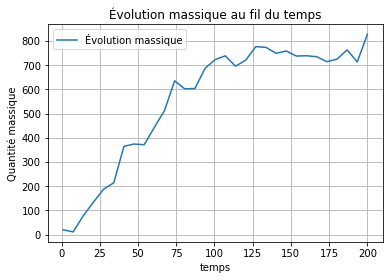

In [5]:
# 3. Afficher le graphique
plt.plot(temps, quantite_massique, label='Évolution massique')
plt.title('Évolution massique au fil du temps')
plt.xlabel('temps')
plt.ylabel('Quantité massique')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# 4 . Résolution du modèle
# Paramètres du modèle
a = 0.07
K = 700

# Conditions initiales
x0 = 16

# Pas de temps et nombre maximal d'itérations
dt = 0.05
kmax = int(500/dt)  # Assurez-vous que le dernier xk soit au même temps que la dernière donnée connue

# Initialisation des tableaux pour stocker les résultats
x_approx = np.zeros(kmax + 1)
x_approx[0] = x0

In [5]:
# Implémentation de l'algorithme de résolution
for k in range(kmax):
    x_approx[k + 1] = x_approx[k] + dt * a * x_approx[k] * np.log(K/x_approx[k])

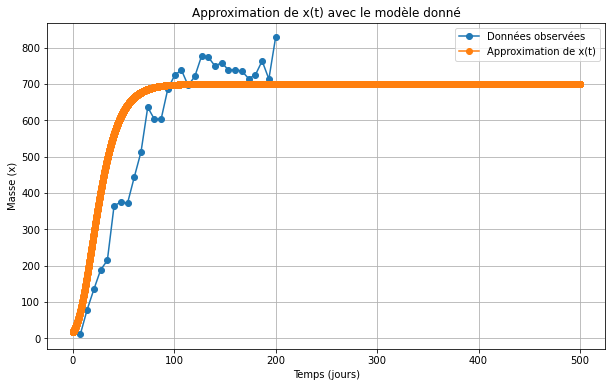

In [7]:
# Afficher l'approximation de x(t) superposée aux données connues
plt.figure(figsize=(10, 6))

# Tracer les données connues
plt.plot(temps, quantite_massique, '-o', label='Données observées')

# Tracer l'approximation de x(t)
temps_approx = np.linspace(0, kmax*dt, kmax + 1)
plt.plot(temps_approx, x_approx, '-o', label='Approximation de x(t)')

# Ajouter un titre et des étiquettes
plt.title('Approximation de x(t) avec le modèle donné')
plt.xlabel('Temps (jours)')
plt.ylabel('Masse (x)')

# Ajouter une légende au graphique
plt.legend()

# Ajouter une grille pour une meilleure lisibilité
plt.grid(True)

# Afficher le graphique
plt.show()

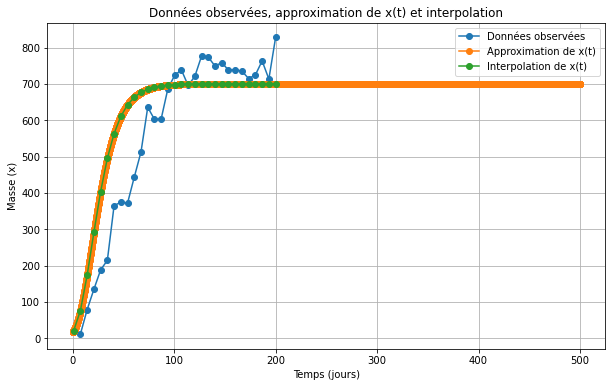

In [8]:
# 2ème pas

# Interpoler les valeurs obtenues sur la grille des données
interpolation_function = interp1d(temps_approx, x_approx, kind='cubic')

# Créer une grille de temps pour l'interpolation
temps_interpolation = temps

# Obtenir les valeurs interpolées aux mêmes points en temps que les données
x_interpolated = interpolation_function(temps_interpolation)

# Afficher les trois courbes sur un même graphique
plt.figure(figsize=(10, 6))

# Tracer les données connues
plt.plot(temps, quantite_massique, '-o', label='Données observées')

# Tracer l'approximation de x(t)
plt.plot(temps_approx, x_approx, '-o', label='Approximation de x(t)')

# Tracer la courbe interpolée
plt.plot(temps_interpolation, x_interpolated, '-o', label='Interpolation de x(t)')

# Ajouter un titre et des étiquettes
plt.title('Données observées, approximation de x(t) et interpolation')
plt.xlabel('Temps (jours)')
plt.ylabel('Masse (x)')

# Ajouter une légende au graphique
plt.legend()

# Ajouter une grille pour une meilleure lisibilité
plt.grid(True)

# Afficher le graphique
plt.show()

In [12]:
def mon_solver(a, K, x0, dt, temps, quantite_massique):
    # Nombre maximal d'itérations
    kmax = int(500/dt)
    
    # Initialisation des tableaux pour stocker les résultats
    x_approx = np.zeros(kmax + 1)
    x_approx[0] = x0
    
    # Implémentation de l'algorithme de résolution
    for k in range(kmax):
        x_approx[k + 1] = x_approx[k] + dt * a * x_approx[k] * np.log(K/x_approx[k])
    
    # Interpoler les valeurs obtenues sur la grille des données
    interpolation_function = CubicSpline(np.linspace(0, kmax*dt, kmax + 1), x_approx, bc_type='natural')
    
    # Obtenir les valeurs interpolées aux mêmes points en temps que les données
    x_interpolated = interpolation_function(temps)
    
    return x_interpolated

In [13]:
# Utilisation de la fonction mon_solver avec les paramètres donnés
a_param = 0.07
K_param = 700
x0_param = 16
dt_param = 0.05

# Appel de la fonction mon_solver
x_result = mon_solver(a_param, K_param, x0_param, dt_param, temps, quantite_massique)

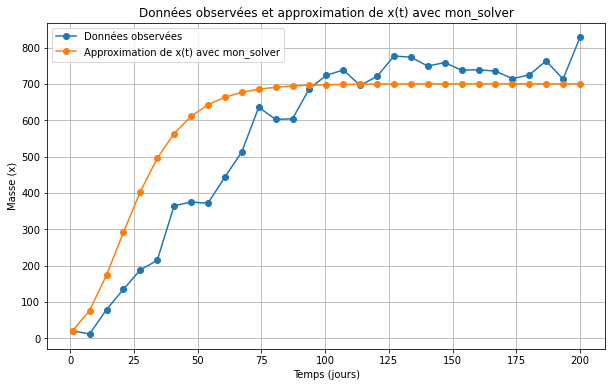

In [14]:
# Affichage des résultats
plt.figure(figsize=(10, 6))

# Tracer les données connues
plt.plot(temps, quantite_massique, '-o', label='Données observées')

# Tracer l'approximation de x(t) obtenue avec mon_solver
plt.plot(temps, x_result, '-o', label='Approximation de x(t) avec mon_solver')

# Ajouter un titre et des étiquettes
plt.title('Données observées et approximation de x(t) avec mon_solver')
plt.xlabel('Temps (jours)')
plt.ylabel('Masse (x)')

# Ajouter une légende au graphique
plt.legend()

# Ajouter une grille pour une meilleure lisibilité
plt.grid(True)

# Afficher le graphique
plt.show()